In [1]:
print("Hello world!")

Hello world!


In [ ]:
from qiskit import __version__
print(__version__)

2.2.3


In [6]:
import numpy as np
ket0 = np.array([[1], [0]])  #|0>
ket1 = np.array([[0], [1]])  #|1>
print(ket0 / 2 + ket1 / 2)
print(np.kron(ket0, ket1))  #|01>
print(np.size(ket0))

[[0.5]
 [0.5]]
[[0]
 [1]
 [0]
 [0]]
2


In [7]:
M1 = np.array([[1, 1], [0, 0]])
M2 = np.array([[1, 0], [0, 1]])
M = M1 / 2 + M2 / 2
print(M)

[[1.  0.5]
 [0.  0.5]]


In [ ]:
print(np.matmul(M1, ket1)) # matrix-vector multiplication
print(np.matmul(M1, M2))
print(np.matmul(M, M))

[[1]
 [0]]
[[1 1]
 [0 0]]
[[1.   0.75]
 [0.   0.25]]


In [ ]:
from qiskit.visualization import array_to_latex  # for pretty-printing (Output formatting)
display(array_to_latex(np.matmul(M1, ket1)))
display(array_to_latex(np.matmul(M1, M2)))
display(array_to_latex(np.matmul(M, M)))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [12]:
from qiskit.quantum_info import Statevector  # functionality for defining and manipulating quantum state vectors
from numpy import sqrt
u = Statevector([1 / sqrt(2), 1 / sqrt(2)])
v = Statevector([(1 + 2.0j) / 3, -2 / 3])
w = Statevector([1 / 3, 2 / 3])
display(u.draw("text"))  # draw: displaying state vectors in a variety of ways
display(u.draw("latex"))
print(u.draw("latex_source"))

[0.70710678+0.j,0.70710678+0.j]

<IPython.core.display.Latex object>

\frac{\sqrt{2}}{2} |0\rangle+\frac{\sqrt{2}}{2} |1\rangle


In [13]:
display(u.is_valid())  # check if state vector is valid
display(v.is_valid())
display(w.is_valid())

True

True

False

In [14]:
display(v.draw("latex"))
outcome, state = v.measure()   # perform a measurement on the statevector
# (outcome of that measurement, new quantum state vector of the system after the measurement)
print(f"Measured: {outcome}\nPost-measurement state:")
display(state.draw("latex"))

<IPython.core.display.Latex object>

Measured: 0
Post-measurement state:


<IPython.core.display.Latex object>

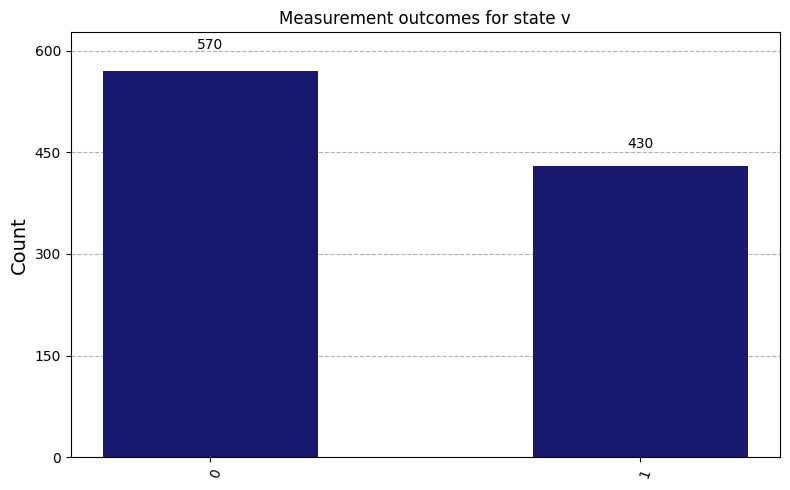

In [15]:
from qiskit.visualization import plot_histogram
stats = v.sample_counts(1000)
plot_histogram(stats, title="Measurement outcomes for state v", figsize=(8, 5), color='midnightblue')

In [16]:
from qiskit.quantum_info import Operator  # functionality for defining and manipulating quantum operators (matrices)
Y = Operator([[0, -1.0j], [1.0j, 0]])
H = Operator([[1 / sqrt(2), 1 / sqrt(2)], [1 / sqrt(2), -1 / sqrt(2)]])
S = Operator([[1, 0], [0, 1.0j]])
T = Operator([[1, 0], [0, (1 + 1.0j) / sqrt(2)]])
display(T.draw("latex"))
display(H.draw("latex"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [26]:
v = Statevector([1, 0])
v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(H)
v = v.evolve(S)
v = v.evolve(Y)
 
display(v.draw("latex"))

<IPython.core.display.Latex object>

Quantum Circuits

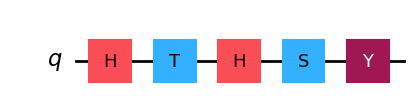

In [27]:
from qiskit import QuantumCircuit 
circuit = QuantumCircuit(1)
circuit.h(0)
circuit.t(0)
circuit.h(0)
circuit.s(0)
circuit.y(0)
 
display(circuit.draw(output="mpl"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

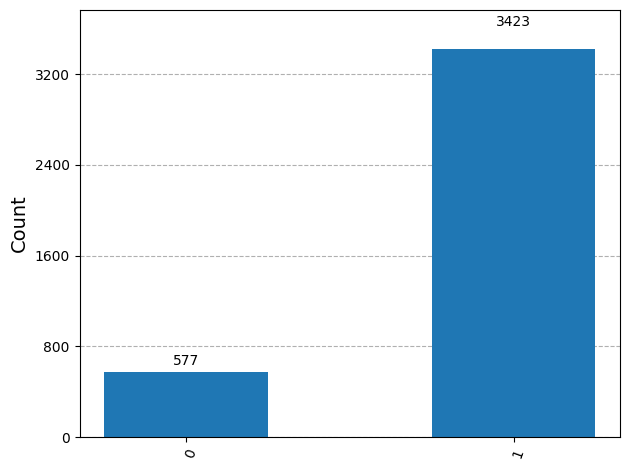

In [ ]:
display(Operator.from_circuit(circuit).draw("latex"))  # display the operator implemented by the circuit
ket0 = Statevector([1, 0])
v = ket0.evolve(circuit)
display(v.draw("latex"))
statistics = v.sample_counts(4000)
display(plot_histogram(statistics))